Tổng số mẫu (hàng) trong file: 10001


C:\Users\Admin\AppData\Local\Temp\ipykernel_18268\2592007597.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


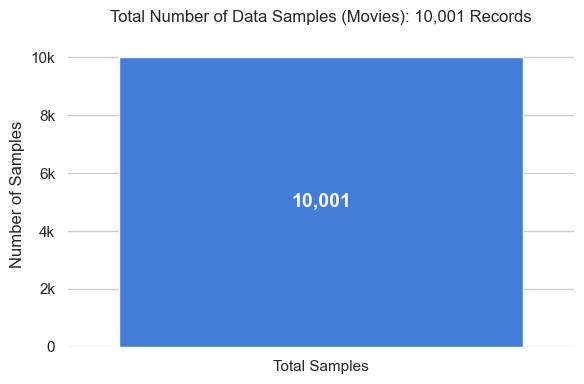

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tên file CSV của bạn (thay thế nếu cần)
FILE_NAME = 'recommend_system.csv'

# --- 1. Đọc Dữ liệu ---
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{FILE_NAME}'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# --- 2. Tính Tổng Số Mẫu (Rows) ---
total_samples = int(len(df))
title_text = f'Total Number of Data Samples (Movies): {total_samples:,} Records'
print(f"Tổng số mẫu (hàng) trong file: {total_samples}")

# --- 3. Trực quan hóa (Tối ưu cho Báo cáo) ---

# Cài đặt kiểu hiển thị của Seaborn
sns.set_theme(style="whitegrid")

# Khởi tạo figure và axes, giữ kích thước nhỏ (ví dụ: 5x3 inches)
plt.figure(figsize=(6, 4)) 

# Tạo biểu đồ Bar Plot
ax = sns.barplot(
    x=['Total Samples'], 
    y=[total_samples], 
    palette=["#2a77f1"] 
)

# --- Điều chỉnh Trục Y (Hiển thị các mốc 2k, 4k, 6k...) ---

# Tìm giá trị lớn nhất (là tổng số mẫu) và làm tròn lên
max_y = total_samples
# Tính toán khoảng cách (interval) cho trục Y (ví dụ: 2000)
interval = 2000 
# Tạo các mốc yticks (0, 2000, 4000, 6000, ...)
yticks = np.arange(0, max_y + interval, interval)
ax.set_yticks(yticks)
# Định dạng các nhãn (labels) trên trục Y (ví dụ: 2k, 4k, 6k)
yticklabels = [f'{int(y/1000)}k' if y > 0 else '0' for y in yticks]
ax.set_yticklabels(yticklabels)

# Đặt giới hạn trục Y
ax.set_ylim(0, max_y * 1.05) 

# --- Đặt Số Lượng Chính Xác Vào Trong Thanh Bar ---

# Lặp qua các thanh bar trong biểu đồ
for p in ax.patches:
    # Lấy chiều cao (giá trị y) của thanh bar
    height = p.get_height()
    # Định dạng giá trị số lượng
    value_label = f'{int(height):,}'
    
    # Đặt text bên trong thanh bar
    ax.text(
        p.get_x() + p.get_width() / 2., # Vị trí X (ở giữa thanh bar)
        height / 2, # Vị trí Y (ở giữa chiều cao thanh bar)
        value_label, 
        ha='center', # Căn giữa theo chiều ngang
        va='center', # Căn giữa theo chiều dọc
        color='white', # Đặt chữ màu trắng để nổi bật trên nền xanh
        fontsize=14,
        fontweight='bold'
    )

# Đặt Tiêu đề chứa giá trị số lượng
plt.title(title_text, fontsize=12, pad=15) 
plt.ylabel('Number of Samples')
plt.xlabel('') 

# Giữ lại lưới ngang (grid lines) để các mốc 2k, 4k, 6k dễ nhìn hơn
sns.despine(left=True, bottom=True) 

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# The name of your processed CSV file
FILE_NAME = 'archive\imdb-movies-dataset.csv' 

# --- 1. Read Data ---
try:
    df = pd.read_csv(FILE_NAME)
    
    # --- 2. Print the list of columns ---
    print("List of all columns (features) in the DataFrame:")
    print("-" * 50)
    
    # Use df.columns.tolist() to get the list of column names
    column_list = df.columns.tolist()
    
    # Print each column with its index
    for i, col in enumerate(column_list):
        print(f"{i+1}. {col}")
        
    print("-" * 50)
    print(f"Total number of columns: {len(column_list)}")
    
except FileNotFoundError:
    print(f"Error: File '{FILE_NAME}' not found. Please check the path.")

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8352\3587575774.py:4: SyntaxWarning: invalid escape sequence '\i'
  FILE_NAME = 'archive\imdb-movies-dataset.csv'


List of all columns (features) in the DataFrame:
--------------------------------------------------
1. Poster
2. Title
3. Year
4. Certificate
5. Duration (min)
6. Genre
7. Rating
8. Metascore
9. Director
10. Cast
11. Votes
12. Description
13. Review Count
14. Review Title
15. Review
--------------------------------------------------
Total number of columns: 15


C:\Users\Admin\AppData\Local\Temp\ipykernel_23396\2969079480.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


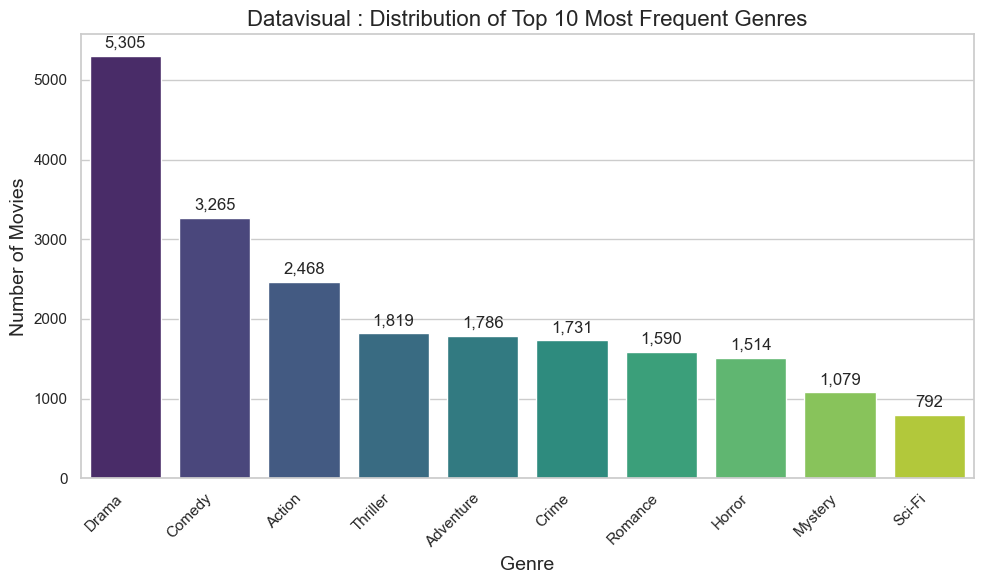

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tên file CSV của bạn (thay thế nếu cần)
FILE_NAME = 'recommend_system.csv'

# --- 1. Đọc Dữ liệu ---
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{FILE_NAME}'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# --- 2. Xử lý và Đếm Thể loại (Genre) ---

# Đảm bảo cột Genre không bị rỗng (NaN)
df_genres = df.dropna(subset=['Genre']).copy()

# Tách chuỗi Genre bằng dấu ", " và mở rộng thành các hàng riêng biệt (Explode)
# Ví dụ: 'Action, Thriller' sẽ thành 2 hàng: 'Action' và 'Thriller'
genres_series = df_genres['Genre'].str.split(', ').explode()

# Đếm tần suất xuất hiện của từng thể loại và lấy 10 thể loại phổ biến nhất
genre_counts = genres_series.value_counts().nlargest(10)

# --- 3. Trực quan hóa (Bar Chart) ---

# Cài đặt kiểu hiển thị
sns.set_theme(style="whitegrid")

# Khởi tạo figure và axes
plt.figure(figsize=(10, 6))

# Tạo biểu đồ Bar Chart
ax = sns.barplot(
    x=genre_counts.index,      # Tên thể loại (Top 10)
    y=genre_counts.values,     # Số lượng phim tương ứng
    palette=sns.color_palette("viridis", 10)
)

# Thêm giá trị số lượng lên trên mỗi cột (tùy chọn)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ',.0f'), # Định dạng số nguyên có dấu phẩy
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 9), 
        textcoords = 'offset points'
    )

# Đặt tiêu đề và nhãn
plt.title('Datavisual : Distribution of Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục X 45 độ để tránh chồng chéo

plt.tight_layout()
plt.show()

In [19]:


# --- 2. Tiền xử lý Rating ---
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') 
df_clean_rating = df.dropna(subset=['Rating'])

# --- 3. Trực quan hóa với Plotly (Histogram) ---

fig_rating = px.histogram(
    df_clean_rating, 
    x='Rating', 
    nbins=20, 
    title='Distribution of Movie Rating Scores ',
    labels={'Rating': 'Rating Score (0-10)', 'count': 'Frequency (Number of Movies)'},
    color_discrete_sequence=['#4c72b0'],
    text_auto=True 
)

# BƯỚC THU NHỎ KÍCH THƯỚC: Sử dụng update_layout
fig_rating.update_layout(
    xaxis_title='Rating Score',
    yaxis_title='Frequency (Number of Movies)',
    bargap=0.1, 
    xaxis_range=[0, 10.1],
    
    # ĐIỀU CHỈNH KÍCH THƯỚC Ở ĐÂY
    width=900,  # Thu nhỏ chiều rộng thành 600 pixels
    height=450  # Giữ chiều cao ở mức hợp lý
)

# Tùy chỉnh vị trí và định dạng của Data Labels 
fig_rating.update_traces(
    textposition='outside', 
    textfont=dict(size=10, color='black') 
)

fig_rating.show()

In [13]:
import pandas as pd
import plotly.express as px

FILE_NAME = 'recommend_system.csv'

# --- 1. Đọc Dữ liệu ---
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{FILE_NAME}'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# --- 2. Tiền xử lý và Nhóm dữ liệu theo Bin 5 năm (ĐÃ SỬA ĐỔI) ---

# Chuyển cột 'Year' sang dạng số
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 

# Lọc các năm hợp lệ (ví dụ: > 1900)
df_clean_year = df[(df['Year'] > 1900) & (df['Year'] <= 2025)].dropna(subset=['Year'])

# TẠO BIN 5 NĂM: Chia năm cho 5, lấy phần nguyên, nhân lại với 5.
# Ví dụ: 2021 // 5 = 404. 404 * 5 = 2020. -> Thuộc Bin 2020-2024
df_clean_year['Year_Bin'] = (df_clean_year['Year'].astype(int) // 5) * 5

# Đếm số lượng phim cho mỗi Bin và sắp xếp theo Bin
bin_counts = df_clean_year['Year_Bin'].value_counts().sort_index().reset_index()
bin_counts.columns = ['Year_Start', 'Count'] # Year_Start là năm bắt đầu của bin (ví dụ: 2020)

# Tạo nhãn Bin đẹp hơn cho trực quan hóa (ví dụ: '2020-2024')
bin_counts['Bin_Label'] = bin_counts['Year_Start'].astype(str) + '-' + (bin_counts['Year_Start'] + 4).astype(str)

# --- 3. Trực quan hóa với Plotly (Line Plot) ---

fig = px.line(
    bin_counts, 
    x='Bin_Label', # Sử dụng nhãn bin làm trục X
    y='Count', 
    title='Trend of Movie Releases (Grouped by 5-Year Bins)',
    labels={
        "Bin_Label": "5-Year Period (Start Year)", 
        "Count": "Total Number of Movies Released"
    }
)

# Cải thiện giao diện
fig.update_traces(
    mode='lines+markers',
    line=dict(color='#C44E52', width=2),
    marker=dict(size=8)
)

fig.update_layout(
    xaxis_tickangle=-45, # Xoay nhãn trục X để dễ đọc
    hovermode="x unified"
)

fig.show()

In [23]:
import pandas as pd
import plotly.express as px

FILE_NAME = 'archive\\imdb-movies-dataset.csv'

# --- 1. Đọc Dữ liệu ---
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{FILE_NAME}'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# --- 2. Tiền xử lý Metascore ---
# Đảm bảo cột Metascore là số (nếu có chuỗi 'N/A' hoặc ký tự khác)
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce') 

# Lọc bỏ các giá trị NaN trong cột Metascore
df_clean_metascore = df.dropna(subset=['Metascore'])

# --- 3. Trực quan hóa với Plotly (Histogram) ---

# Tạo biểu đồ Histogram (Biểu đồ Cột) cho Metascore
fig_metascore = px.histogram(
    df_clean_metascore, 
    x='Metascore', 
    nbins=20, # Chia thành 20 cột (mỗi cột 5 điểm, ví dụ 50-55, 55-60)
    title='Distribution of Movie Metascore (0-100) ',
    labels={'Metascore': 'Metascore (Professional Review)', 'count': 'Frequency (Number of Movies)'},
    color_discrete_sequence=['#55A868'], # Màu xanh lá cây
    text_auto=True # Hiển thị số liệu trên thanh bar
)

# Cải thiện giao diện
fig_metascore.update_layout(
    xaxis_title='Metascore',
    yaxis_title='Frequency (Number of Movies)',
    bargap=0.05, 
    xaxis_range=[0, 100], # Giới hạn trục X từ 0 đến 100
    width=700,  # Chiều rộng hợp lý
    height=450
)

# Tùy chỉnh vị trí và định dạng của Data Labels 
fig_metascore.update_traces(
    textposition='outside', 
    textfont=dict(size=10, color='black') 
)

fig_metascore.show()

In [28]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

FILE_NAME = 'archive\\imdb-movies-dataset.csv'

# --- 1. Đọc và Tiền xử lý Dữ liệu (ĐÃ SỬA LỖI) ---
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{FILE_NAME}'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

numerical_cols = ['Rating', 'Metascore', 'Duration (min)', 'Votes', 'Review Count']

# BƯỚC SỬA LỖI: Làm sạch các cột có dấu phẩy
for col in ['Votes', 'Review Count']:
    # Chỉ áp dụng nếu cột là object (chuỗi)
    if df[col].dtype == 'object':
        df[col] = (
            df[col]
            .astype(str)            # Chắc chắn là chuỗi
            .str.replace(',', '', regex=False) # Xóa dấu phẩy
        )
    # Sau đó, chuyển sang số. Dùng errors='coerce' để biến các giá trị không phải số thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Chuẩn bị các cột số khác (đã làm ở các bước trước)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') 
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce') 
df['Duration (min)'] = pd.to_numeric(df['Duration (min)'], errors='coerce') 

# Tạo DataFrame chỉ chứa các cột số đã được làm sạch
df_corr = df[numerical_cols].dropna()

# --- 2. Tính toán Ma trận Tương quan ---
correlation_matrix = df_corr.corr().round(2) 

# --- 3. Trực quan hóa với Plotly Heatmap ---

fig_heatmap = px.imshow(
    correlation_matrix,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=px.colors.sequential.RdBu,
    title='Correlation Heatmap of Numerical Features ',
)

# Cải thiện giao diện
fig_heatmap.update_layout(
    xaxis={'side': 'bottom'},
    width=750, 
    height=700
)

# Thêm chú thích cho dải màu (Colorbar)
fig_heatmap.update_coloraxes(
    colorbar_title='Pearson r',
    cmin=-1, 
    cmax=1
)

fig_heatmap.show()

In [35]:
import pandas as pd
import plotly.express as px


for col in ['Rating', 'Metascore']:
    if df[col].dtype == 'object':
        df[col] = (df[col].astype(str).str.replace(',', '', regex=False))
    df[col] = pd.to_numeric(df[col], errors='coerce') 

df_clean = df.dropna(subset=['Rating', 'Metascore'])

# --- 2. Trực quan hóa với Plotly 2D Histogram ---

# Sử dụng px.histogram_2d
# SỬ DỤNG PHƯƠNG ÁN DỰ PHÒNG: px.density_heatmap
fig_hist2d = px.density_heatmap(
    df_clean,
    x='Rating',
    y='Metascore',
    nbinsx=15, 
    nbinsy=15, 
    title='Data Density of Rating vs. Metascore (Density Heatmap)',
    labels={'Rating': 'User Rating Score (0-10)', 'Metascore': 'Professional Metascore (0-100)', 'z': 'Number of Movies'}, # z thay cho count
    color_continuous_scale=px.colors.sequential.Viridis
)
# Các lệnh update_layout và update_traces còn lại giữ nguyên

# Cải thiện giao diện
fig_hist2d.update_layout(
    xaxis_title='User Rating (0-10)',
    yaxis_title='Professional Metascore (0-100)',
    width=750, 
    height=600
)

# Đảm bảo dải màu hiển thị mật độ rõ ràng
fig_hist2d.update_traces(
    colorbar=dict(title="Density")
)

fig_hist2d.show()

In [4]:
import pandas as pd
import plotly.express as px

# Lưu ý: Cần đảm bảo DataFrame 'df' đã được định nghĩa trước khi chạy đoạn code này.
# (Giả định df đã được tải từ file hoặc được tạo ở bước trước)

N = 10  # Số lượng phim bạn muốn hiển thị (Top 10)

# 1. Sắp xếp và Lọc Top N
df_sorted = df.sort_values(by='Rating', ascending=False)
df_top_n = df_sorted.head(N)
# Đảo ngược thứ tự cho biểu đồ (Rating thấp đến cao)
df_top_n = df_top_n.sort_values(by='Rating', ascending=True)


# ==========================================================
# 2. VẼ BIỂU ĐỒ CỘT NGANG (Plotly Express Bar Chart)
# ==========================================================

fig = px.bar(
    df_top_n,
    x='Rating',          # Trục x (độ dài cột) là Rating
    y='Title',           # Trục y (tên các cột) là Title
    orientation='h',     # Thiết lập biểu đồ cột ngang (horizontal)
    title=f'Top {N} Movies by Highest Rating',
    # Màu sắc dựa trên Rating
    color='Rating',
    # Thiết lập màu gradient (có thể chọn màu khác phù hợp với nền sáng)
    color_continuous_scale=px.colors.sequential.Sunset, 
    
    # Thiết lập thông tin hiển thị khi di chuột (hover information)
    hover_data={'Title': True, 'Rating': True},
)

# ==========================================================
# 3. TÙY CHỈNH LAYOUT (Nền Trắng và Kích thước)
# ==========================================================

fig.update_layout(
    xaxis_title='Rating Score',
    yaxis_title='Movie Title',
    
    # Thay đổi sang nền trắng (Light Theme)
    font=dict(color='black'),         # Màu chữ đen
    plot_bgcolor='white',             # Màu nền khu vực vẽ là trắng
    paper_bgcolor='rgba(255,255,255,0.8)', # Màu nền tổng thể hơi trong suốt trắng (hoặc 'white')
    
    title_font_size=20,
    
    # Thu nhỏ kích thước biểu đồ (được định nghĩa bằng pixels)
    height=400, # Chiều cao 400 pixels
    width=650,  # Chiều rộng 650 pixels
    
    coloraxis_colorbar=dict(
        title="Rating",
        # Đảm bảo chú thích màu cũng có chữ đen trên nền sáng
        tickfont=dict(color='black'),
        title_font=dict(color='black')
    )
)

# Hiển thị biểu đồ
fig.show()